<a href="https://colab.research.google.com/github/codejstar/vehicle-classification/blob/master/Vehicle_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile as vehiclezip
import os as os_veh
import matplotlib.pyplot as pltveh
import matplotlib.image as mpimgveh
import shutil as shut_veh
from sklearn.model_selection import train_test_split as tts_veh
from tensorflow.keras.preprocessing.image import ImageDataGenerator as imgg_gen_veh
import numpy as npveh

Unzipping done. Vehicle images are now ready!
Vehicle Class: Cars — Total number of images: 790
Filenames of five sample vehicle images: ['Car (509).jpg', 'Car (83).jpg', 'Car (13).jpg', 'Car (117).jpg', 'Car (148).jpg']


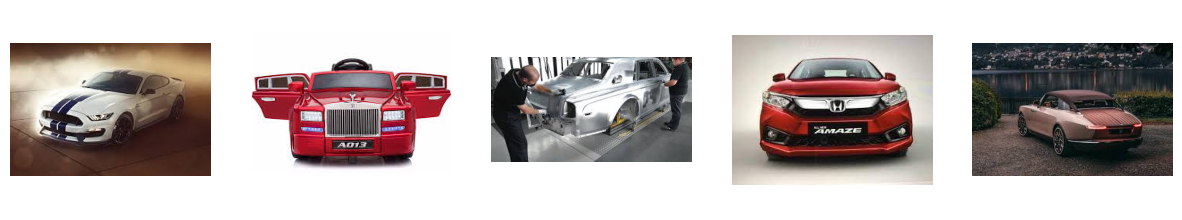

------------------------------------------------------------------------------------------------------------------------------------------------------
Vehicle Class: Planes — Total number of images: 800
Filenames of five sample vehicle images: ['Plane (305).jpg', 'Plane (738).jpg', 'Plane (431).jpg', 'Plane (727).jpg', 'Plane (536).jpg']


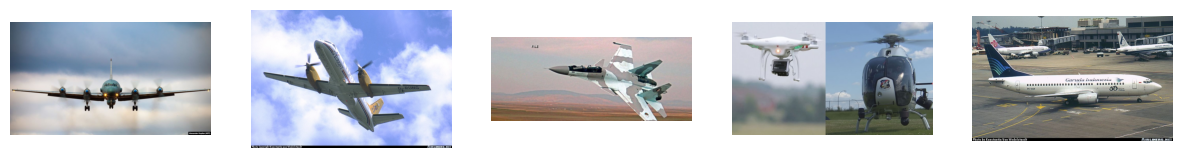

------------------------------------------------------------------------------------------------------------------------------------------------------
Vehicle Class: Trains — Total number of images: 800
Filenames of five sample vehicle images: ['Train (7).png', 'Train (644).png', 'Train (255).png', 'Train (574).png', 'Train (515).jpg']


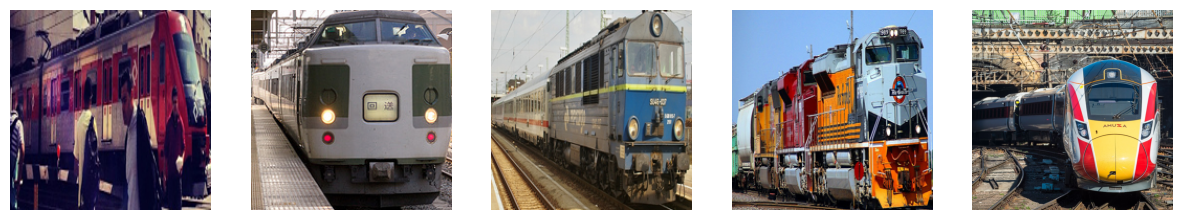

------------------------------------------------------------------------------------------------------------------------------------------------------
Vehicle Class: Bikes — Total number of images: 800
Filenames of five sample vehicle images: ['Bike (638).jpg', 'Bike (350).jpg', 'Bike (624).jpg', 'Bike (97).jpg', 'Bike (761).jpg']


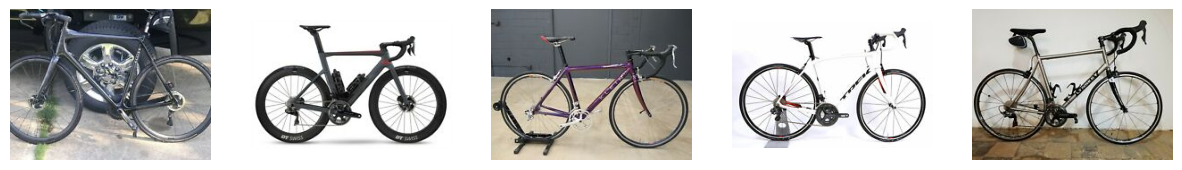

------------------------------------------------------------------------------------------------------------------------------------------------------
Vehicle Class: Auto Rickshaws — Total number of images: 800
Filenames of five sample vehicle images: ['Auto Rickshaw (351).jpg', 'Auto Rickshaw (751).jpg', 'Auto Rickshaw (115).jpg', 'Auto Rickshaw (658).jpg', 'Auto Rickshaw (463).jpg']


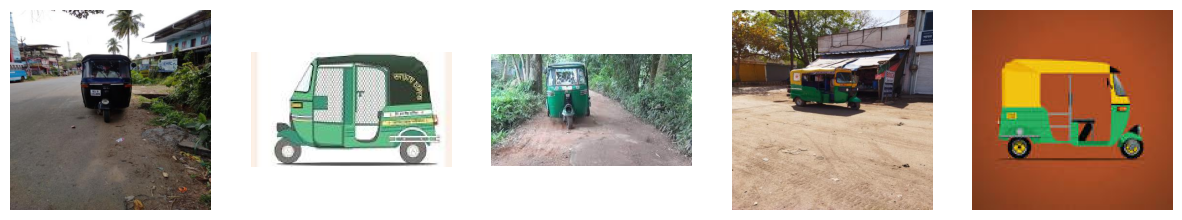

------------------------------------------------------------------------------------------------------------------------------------------------------
Vehicle Class: Ships — Total number of images: 800
Filenames of five sample vehicle images: ['Ship (567).jpg', 'Ship (694).jpg', 'Ship (451).jpg', 'Ship (588).jpg', 'Ship (593).jpg']


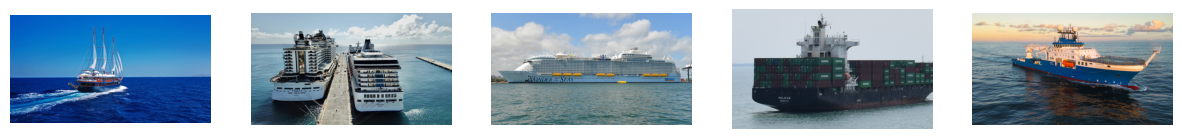

------------------------------------------------------------------------------------------------------------------------------------------------------
Vehicle Class: Motorcycles — Total number of images: 800
Filenames of five sample vehicle images: ['Motorcycle (516).jpg', 'Motorcycle (427).jpg', 'Motorcycle (657).jpg', 'Motorcycle (36).jpg', 'Motorcycle (267).jpg']


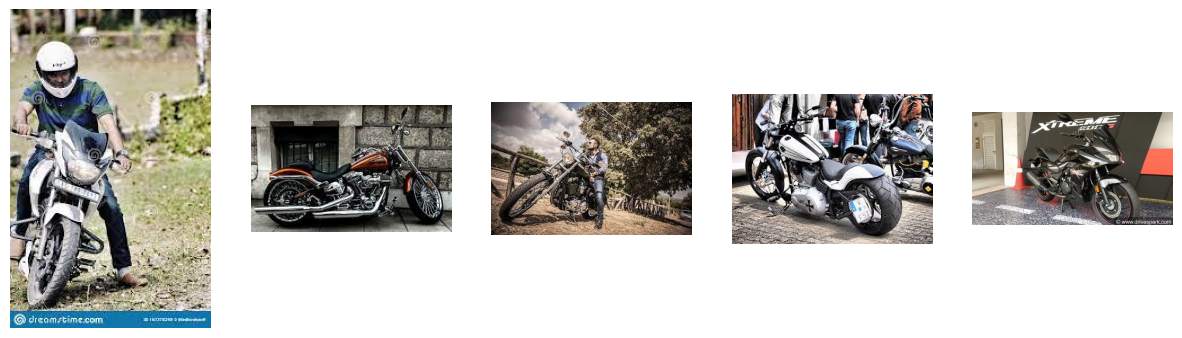

------------------------------------------------------------------------------------------------------------------------------------------------------


In [4]:
import os as os_veh
import zipfile as vehiclezip
import matplotlib.pyplot as pltveh
import matplotlib.image as mpimgveh

vehicle_base_drive = '/content/drive/MyDrive/Vehicle Classification'
vehicle_zip_dir = os_veh.path.join(vehicle_base_drive, 'vehicles.zip')
vehicle_extract_dir = '/content/vehicle_data'

with vehiclezip.ZipFile(vehicle_zip_dir, 'r') as zip_ref:
    zip_ref.extractall(vehicle_extract_dir)
print("Unzipping done. Vehicle images are now ready!")

vehicle_main_dir = os_veh.path.join(vehicle_extract_dir, 'Vehicles')

for clas_vehicle in os_veh.listdir(vehicle_main_dir):
    clas_path_veh = os_veh.path.join(vehicle_main_dir, clas_vehicle)
    if os_veh.path.isdir(clas_path_veh):
        pictures = os_veh.listdir(clas_path_veh)
        full_veh_cnt = len(pictures)
        sampl_pics = pictures[:5]
        print(f"Vehicle Class: {clas_vehicle} — Total number of images: {full_veh_cnt}")
        print("Filenames of five sample vehicle images:", sampl_pics)

        pltveh.figure(figsize=(15, 5))
        for iv, pic_nam in enumerate(sampl_pics):
            pic_rout = os_veh.path.join(clas_path_veh, pic_nam)
            pic = mpimgveh.imread(pic_rout)

            pltveh.subplot(1, 5, iv + 1)
            pltveh.imshow(pic)
            pltveh.axis('off')

        pltveh.show()
        print('-' * 150)

# **Data Splitting**

In [5]:
split_output_dir = os_veh.path.join('/content', 'vehicle_data_split')
tt_rto = 0.2  # 20% data taken for testing

# Create train and test folders
for veh_foldr in ['train', 'test']:
    os_veh.makedirs(os_veh.path.join(split_output_dir, veh_foldr), exist_ok=True)

# Splitting and copying vehicle images
for clas_vehicle in os_veh.listdir(vehicle_main_dir):
    clas_path_veh = os_veh.path.join(vehicle_main_dir, clas_vehicle)
    if not os_veh.path.isdir(clas_path_veh):
        continue

    all_pics = os_veh.listdir(clas_path_veh)
    tn_pics, tt_pics = tts_veh(all_pics, test_size=tt_rto, random_state=42)

    for split_type, image_list in [('train', tn_pics), ('test', tt_pics)]:
        dest_direc = os_veh.path.join(split_output_dir, split_type, clas_vehicle)
        os_veh.makedirs(dest_direc, exist_ok=True)
        for picc in image_list:
            shut_veh.copy(os_veh.path.join(clas_path_veh, picc), os_veh.path.join(dest_direc, picc))

print("Dataset successfully splitted into training and testing sets!")
for split_type in ['train', 'test']:
    print(f"\n {split_type.upper()} SET:")
    split_path = os_veh.path.join(split_output_dir, split_type)
    for clas_vehicle in os_veh.listdir(split_path):
        img_count = len(os_veh.listdir(os_veh.path.join(split_path, clas_vehicle)))
        print(f"{clas_vehicle}: {img_count} images")
    print('-' * 80)

Dataset successfully splitted into training and testing sets!

 TRAIN SET:
Cars: 632 images
Planes: 640 images
Trains: 640 images
Bikes: 640 images
Auto Rickshaws: 640 images
Ships: 640 images
Motorcycles: 640 images
--------------------------------------------------------------------------------

 TEST SET:
Cars: 158 images
Planes: 160 images
Trains: 160 images
Bikes: 160 images
Auto Rickshaws: 160 images
Ships: 160 images
Motorcycles: 160 images
--------------------------------------------------------------------------------


# **Image Preprocessing**

Found 4469 images belonging to 7 classes.
Found 1118 images belonging to 7 classes.
All vehicle images are successfully resized to 224x224 and rescaled to [0, 1] range.
Batch size: 32 | Label format: One-hot encoded categorical


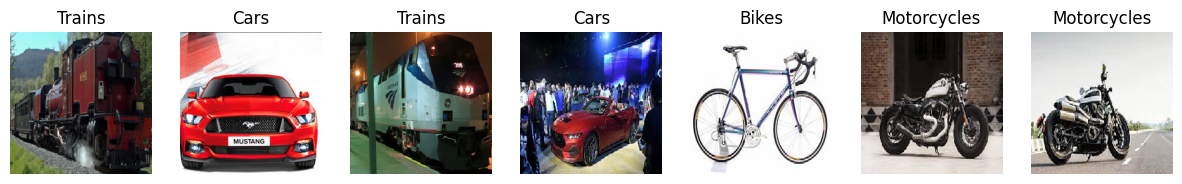

In [6]:
# rescaling the vehicle images
veh_img_genn = imgg_gen_veh(rescale=1./255)
sze_veh = (224, 224) # target size
sze_bch = 32  #batch size
one_hot_veh = 'categorical' # class mode


#training data path
vehicle_trn_pics = veh_img_genn.flow_from_directory(
    os_veh.path.join(split_output_dir, 'train'),
    target_size = sze_veh,
    batch_size = sze_bch,
    class_mode = one_hot_veh
)

#testing data path
vehicle_tst_pics = veh_img_genn.flow_from_directory(
    os_veh.path.join(split_output_dir, 'test'),
    target_size = sze_veh,
    batch_size = sze_bch,
    class_mode = one_hot_veh
)
print("All vehicle images are successfully resized to 224x224 and rescaled to [0, 1] range.")
print("Batch size: 32 | Label format: One-hot encoded categorical")

veh_pics, veh_lbls = next(vehicle_trn_pics)
pltveh.figure(figsize=(15, 5))
for iv in range(7):
    pltveh.subplot(1, 7, iv + 1)
    pltveh.imshow(veh_pics[iv])
    lbl_veh_idx = npveh.argmax(veh_lbls[iv])
    clas_veh_nme = list(vehicle_trn_pics.class_indices.keys())[lbl_veh_idx]
    pltveh.title(clas_veh_nme)
    pltveh.axis('off')
pltveh.show()